In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MuhammadYusufAndrika/tripskuy-capstone/refs/heads/main/destinations-new.csv")
df.head(5)

,id_place,name_place,price_place,rating_place,id_city,id_category,name_category,name_city,desc_place,url_image,coordinate
0,6,Taman Impian Jaya Ancol,25000,4.5,212,2,Taman Hiburan,Jakarta Utara,Taman Impian Jaya Ancol merupakan sebuah objek...,https://storage.googleapis.com/picture-bucket1...,"-6.117333200000001, 106.8579951"
1,47,Taman Situ Lembang,0,4.5,216,2,Taman Hiburan,Jakarta Pusat,Taman Situ Lembang adalah sebuah taman kota ya...,https://storage.googleapis.com/picture-bucket1...,"-6.1978861, 106.8346708"
2,66,Museum Layang-layang,10000,4.5,215,1,Budaya,Jakarta Selatan,Museum Layang-Layang adalah sebuah museum yang...,https://storage.googleapis.com/picture-bucket1...,"-6.3080282, 106.790548"
3,1,Monumen Nasional,20000,4.6,216,1,Budaya,Jakarta Pusat,Monumen Nasional atau yang populer disingkat d...,https://storage.googleapis.com/picture-bucket1...,"-6.1753924, 106.8271528"
4,2,Kota Tua,0,4.6,213,1,Budaya,Jakarta Barat,"Kota tua di Jakarta, yang juga bernama Kota Tu...",https://storage.googleapis.com/picture-bucket1...,"-6.137644799999999, 106.8171245"


In [ ]:
print(df.columns)

Index(['id_place', 'name_place', 'price_place', 'rating_place', 'id_city',
       'id_category', 'name_category', 'name_city', 'desc_place', 'url_image',
       'coordinate'],
      dtype='object')


In [ ]:
# Menampilkan type data pada setiap kolom
print(df.dtypes)

id_place           int64
name_place        object
price_place        int64
rating_place     float64
id_city            int64
id_category        int64
name_category     object
name_city         object
desc_place        object
url_image         object
coordinate        object
dtype: object


In [ ]:
#Print datashape (Sangat Terbatas dataset nya, susah dicari)
df.shape

(437, 11)

In [ ]:
# Fungsi df.info() digunakan untuk mendapatkan informasi ringkas tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_place       437 non-null    int64  
 1   name_place     437 non-null    object 
 2   price_place    437 non-null    int64  
 3   rating_place   437 non-null    float64
 4   id_city        437 non-null    int64  
 5   id_category    437 non-null    int64  
 6   name_category  437 non-null    object 
 7   name_city      437 non-null    object 
 8   desc_place     437 non-null    object 
 9   url_image      437 non-null    object 
 10  coordinate     437 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 37.7+ KB


In [ ]:
# Display the value counts for each column
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("-" * 20)

Value counts for column 'id_place':
id_place
6      1
289    1
310    1
298    1
308    1
      ..
139    1
138    1
137    1
136    1
436    1
Name: count, Length: 437, dtype: int64
--------------------
Value counts for column 'name_place':
name_place
Taman Impian Jaya Ancol                  1
Curug Aseupan                            1
Taman Bunga Cihideung                    1
Gunung Lalakon                           1
Pemandian Air Panas Ciater               1
                                        ..
Puncak Gunung Api Purba - Nglanggeran    1
Jogja Exotarium                          1
Wisata Alam Kalibiru                     1
Grojogan Watu Purbo Bangunrejo           1
Taman Flora Bratang Surabaya             1
Name: count, Length: 437, dtype: int64
--------------------
Value counts for column 'price_place':
price_place
0         137
10000      52
5000       51
15000      24
50000      19
20000      16
25000      15
3000       15
2000       14
30000       8
2500        7
35000    

<Axes: xlabel='name_category'>

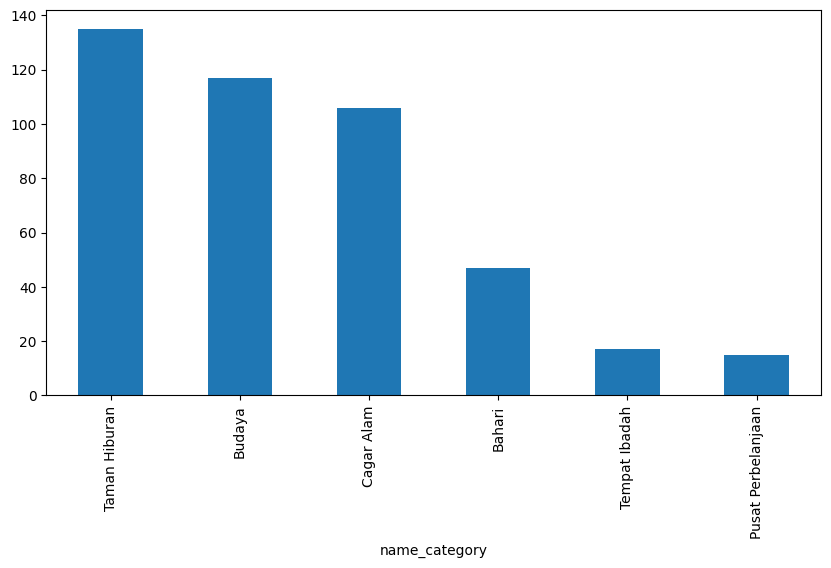

In [ ]:
# Genre distribution
df.to_csv("https://raw.githubusercontent.com/MuhammadYusufAndrika/tripskuy-capstone/refs/heads/main/tourism_linkl.csv", index=False, header=True)
df['name_category'].value_counts().plot(x = 'name_category', y ='count', kind = 'bar', figsize = (10,5))

In [ ]:
#encode/mengubah category dan city untuk inputan agar mudah di proses
le_category = LabelEncoder()
le_city = LabelEncoder()
df['category_encoded'] = le_category.fit_transform(df['name_category'])
df['city_encoded'] = le_city.fit_transform(df['name_city'])

In [ ]:
df['city_encoded'].describe()

,city_encoded
count,437.000000
mean,4.903890
std,3.809682
min,0.000000
25%,0.000000
50%,7.000000
75%,9.000000
max,9.000000


In [ ]:
#fitur prediksi / inputan
X = df[['category_encoded', 'price_place', 'city_encoded']]
#target prediksi
y = df['rating_place']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#scaler sebagai alat yang akan melakukan standardisasi.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#convert data ke tensorflow
X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [ ]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    #menggunakan optimizer adam
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae' , 'accuracy']
)

In [ ]:
# mencegah overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# Train the model
history = model.fit(
    X_train_tf,
    y_train_tf,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0000e+00 - loss: 17.7599 - mae: 4.2044 - val_accuracy: 0.0000e+00 - val_loss: 15.6120 - val_mae: 3.9402
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 15.2852 - mae: 3.8951 - val_accuracy: 0.0000e+00 - val_loss: 12.3153 - val_mae: 3.4901
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 11.9802 - mae: 3.4281 - val_accuracy: 0.0000e+00 - val_loss: 8.4194 - val_mae: 2.8613
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 7.8263 - mae: 2.7240 - val_accuracy: 0.0000e+00 - val_loss: 4.6924 - val_mae: 2.0769
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 4.8866 - mae: 2.0345 - val_accuracy: 0.0000e+00 - val_loss: 1.8878 - val_mae: 1.1703
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 2.3872 - mae: 1.2676 - val_accuracy: 0.0000e+00 - val_loss: 0.8309 - val_mae: 0.6457
Epoc

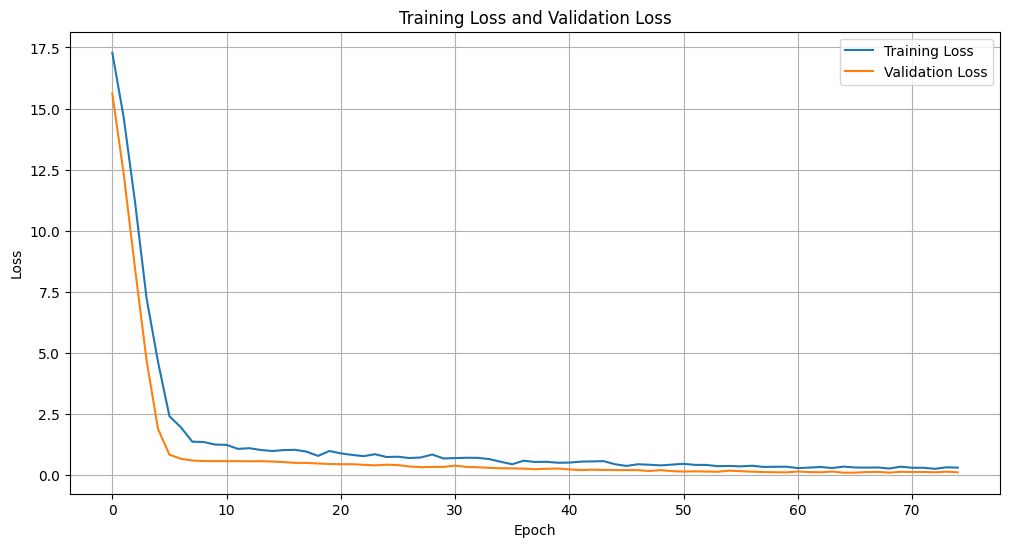

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

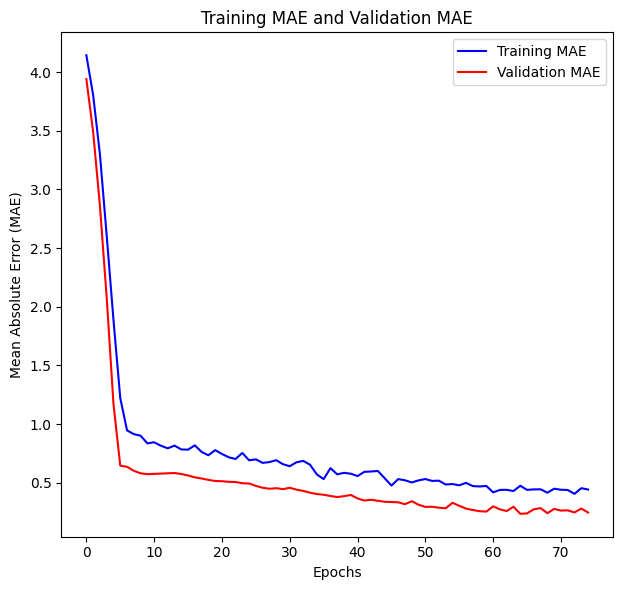

In [ ]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE', color='blue')  # MAE untuk training
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')  # MAE untuk validation
plt.title('Training MAE and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Prediksi pada data test
y_pred_tf = model.predict(X_test_tf, verbose=0)

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_tf - y_pred_tf) / y_test_tf)) * 100

# Menampilkan hasil MAPE sebagai persentase
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# Jika ingin menghitung akurasi (nilai lebih kecil lebih baik)
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")


MAPE (Mean Absolute Percentage Error): 5.39%
Model Accuracy: 94.61%


In [ ]:
def main():
    while True:
        print("\n=== Tourism Destination Recommendations ===")

        # Display and validate category input
        print("\nAvailable Categories:")
        categories = df['name_category'].unique()
        print(categories)
        while True:
            category = input("Enter Tourism Category: ")
            if category in categories:
                break
            print("Invalid category. Please choose from the available options.")

        # Display and validate city input
        print("\nAvailable Cities:")
        cities = df['name_city'].unique()
        print(cities)
        while True:
            city = input("Enter Destination City: ")
            if city in cities:
                break
            print("Invalid city. Please choose from the available options.")

        # Validate price input
        while True:
            try:
                price = float(input("Enter Price (Rp): "))
                break
            except ValueError:
                print("Please enter a valid number for price!")

        # Prepare input for ML model
        category_encoded = le_category.transform([category])[0]
        city_encoded = le_city.transform([city])[0]
        input_data = scaler.transform([[category_encoded, price, city_encoded]])
        input_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)

        # Predict rating
        predicted_rating = float(model.predict(input_tensor, verbose=0)[0][0])
        print(f"\nPredicted Overall Rating: {predicted_rating:.2f}")

        # Filter destinations
        filtered_df = df[
            (df['name_category'] == category) &
            (df['name_city'] == city)
        ]

        if filtered_df.empty:
            print("No destinations match the criteria.")
            continue

        # Calculate price difference and get top recommendations
        filtered_df['price_diff'] = abs(filtered_df['price_place'] - price)
        recommendations = filtered_df.nsmallest(10, 'price_diff')[
            ['name_place', 'price_place', 'rating_place', 'desc_place','coordinate', 'url_image']
        ].reset_index(drop=True)

        # Display recommendations with detailed information
        print("\n=== Top Recommended Destinations ===")
        for idx, row in recommendations.iterrows():
            print(f"\n{idx+1}. {row['name_place']}")
            print(f"   Price: Rp {row['price_place']:,.0f}")
            print(f"   Rating: {row['rating_place']:.2f}")
            print(f"   Description: {row['desc_place']}")
            print(f"   Image URL: {row['url_image']}")
            print(f"   Titik Koordinat: {row['coordinate']}")


        # Continue or exit prompt
        if input("\nWant to search for more recommendations? (y/n): ").lower() != 'y':
            break

if __name__ == "__main__":
    main()


=== Tourism Destination Recommendations ===

Available Categories:
['Taman Hiburan' 'Budaya' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


In [ ]:
import tensorflow as tf
import pickle
import json
import os

# Buat direktori untuk menyimpan semua file
os.makedirs('model_export', exist_ok=True)

# 1. Simpan model TensorFlow
# Simpan dalam format SavedModel (untuk deployment)
model.save('model_export/tourism_model.keras')

# Simpan dalam format H5 (alternatif format yang lebih ringan)
model.save('model_export/tourism_model.h5')

# 2. Simpan Scaler
with open('model_export/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Simpan Label Encoders
with open('model_export/category_encoder.pkl', 'wb') as f:
    pickle.dump(le_category, f)

with open('model_export/city_encoder.pkl', 'wb') as f:
    pickle.dump(le_city, f)

# 4. Simpan metadata penting
metadata = {
    'feature_names': ['category_encoded', 'price_place', 'city_encoded'],
    'input_shape': (3,),
    'categories': le_category.classes_.tolist(),
    'cities': le_city.classes_.tolist(),
    'model_version': '1.0'
}

with open('model_export/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

# 5. Buat contoh kode penggunaan
usage_example = """
# Contoh penggunaan model
import tensorflow as tf
import pickle
import json

# Load model dan dependencies
model = tf.keras.models.load_model('tourism_model')
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('category_encoder.pkl', 'rb') as f:
    category_encoder = pickle.load(f)
with open('city_encoder.pkl', 'rb') as f:
    city_encoder = pickle.load(f)
with open('metadata.json', 'r') as f:
    metadata = json.load(f)

def predict_tourism(category, price, city):
    # Encode inputs
    category_encoded = category_encoder.transform([category])[0]
    city_encoded = city_encoder.transform([city])[0]

    # Scale features
    input_data = scaler.transform([[category_encoded, price, city_encoded]])

    # Convert to tensor
    input_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)

    # Predict
    prediction = model.predict(input_tensor, verbose=0)[0][0]
    return float(prediction)
"""

with open('model_export/usage_example.py', 'w') as f:
    f.write(usage_example)

# 6. Buat README
readme_content = """
# Tourism Recommendation Model

## Files Description
- `tourism_model/`: SavedModel format (untuk deployment)
- `tourism_model.h5`: Model dalam format H5
- `scaler.pkl`: Standard Scaler untuk normalisasi input
- `category_encoder.pkl`: Label Encoder untuk kategori wisata
- `city_encoder.pkl`: Label Encoder untuk kota
- `metadata.json`: Informasi tentang model dan fitur
- `usage_example.py`: Contoh kode penggunaan model

## Input Features
1. category: Kategori wisata (string)
2. price: Harga dalam Rupiah (float)
3. city: Nama kota (string)

## Requirements
- TensorFlow 2.x
- scikit-learn
- numpy

## Deployment Notes
- Pastikan semua file dipindahkan bersama-sama
- Gunakan TensorFlow Serving untuk deployment di production
- Perhatikan versi dependencies saat deployment
"""

with open('model_export/README.md', 'w') as f:
    f.write(readme_content)

In [ ]:
import os

# Save the model
model.save('tourism_recommendation_model.keras') # Add .keras extension to the filename

# Check if the model directory exists, if not create one
model_directory = 'tourism_recommendation_model'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the label encoders and scaler
import joblib
joblib.dump(le_category, os.path.join(model_directory, 'le_category.pkl'))
joblib.dump(le_city, os.path.join(model_directory, 'le_city.pkl'))
joblib.dump(scaler, os.path.join(model_directory, 'scaler.pkl'))